# Измерения SAT-солвера (DPLL)

## Тестовый стенд
- HUAWEI MateBook D15 BoDE-WXX9-PCB-B4
- CPU: 11th Gen Intel(R) Core(TM) i5-1155G7 @ 2.50GHz
- Ядра: 8
- Максимальная частота: 4500 GHz
- ОЗУ: 16GB
- ОС: Ubuntu 22.04.4 LTS

## Подготовка тестового стенда
* Закрытие приложений
* Отключение интернет-соединения
* Оключение swap
* Фиксация частоты процессора
* Переход в режим высокой производительности
* Подключение к сети питания
* Переключение в режим терминала
* Задание высшего приоритета
* Прикрепление к конкретному процессору

## Методика проведения эксперимента
* Измерение производилось на файле, содержащем 100 переменных и 160 дизъюнктов (см. tests/5.txt)
* Предварительный прогрев: 40 итераций
* Замеры: 80 итераций
* Сборка в Release

## Вычисления
* Замеры проводились с помощью Stopwatch, который выдает время в миллисекундах
* Для получения времени в секундах значения делятся на 1000

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

f = "res2.txt"
t = []
with open(f, 'r') as file:
    for line in file:
        clear = line.strip()
        if clear:
            t.append(int(clear) / 1000)

print(t)

[6.697, 6.69, 6.686, 6.69, 6.684, 6.691, 6.695, 6.687, 6.691, 6.682, 6.692, 6.699, 6.695, 6.691, 6.694, 6.696, 6.698, 6.695, 6.697, 6.693, 6.688, 6.697, 6.705, 6.701, 6.694, 6.701, 6.708, 6.697, 6.702, 6.699, 6.697, 6.691, 6.705, 6.697, 6.702, 6.708, 6.694, 6.706, 6.686, 6.701, 6.706, 6.687, 6.704, 6.707, 6.706, 6.701, 6.705, 6.705, 6.685, 6.705, 6.685, 6.685, 6.693, 6.699, 6.694, 6.696, 6.697, 6.696, 6.698, 6.687, 6.698, 6.705, 6.689, 6.705, 6.705, 6.7, 6.708, 6.686, 6.689, 6.697, 6.692, 6.689, 6.697, 6.703, 6.695, 6.702, 6.68, 6.702, 6.699, 6.679]


(array([ 2.,  2.,  9.,  6.,  8., 11., 16.,  9., 10.,  7.]),
 array([6.679 , 6.6819, 6.6848, 6.6877, 6.6906, 6.6935, 6.6964, 6.6993,
        6.7022, 6.7051, 6.708 ]),
 <BarContainer object of 10 artists>)

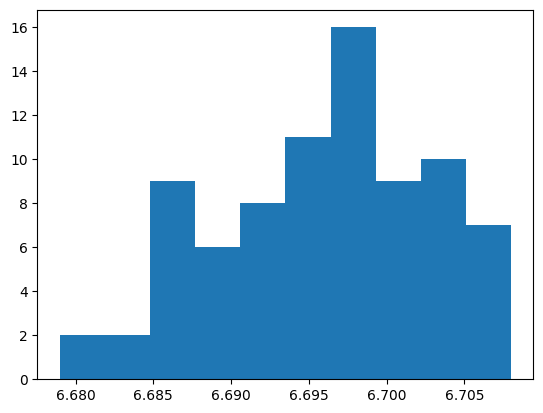

In [2]:
plt.hist(t)

### Анализ результатов измерений
* Внешне диаграмма соответствует нормальному распределению
* Тест на нормальность:

In [3]:
test_normal = stats.normaltest(t)
test_shapiro = stats.shapiro(t)

print(test_normal, test_shapiro, sep = '\n')
if test_normal[1] > 0.05 or test_shapiro[1] > 0.05:
    print("Тест пройден")

NormaltestResult(statistic=4.210740110410843, pvalue=0.12180059298485539)
ShapiroResult(statistic=0.9700481117715415, pvalue=0.057151216095653795)
Тест пройден


### Вычисления
Среднее: $\bar{t} = \frac{\sum_{i=1}^{n} t_i}{n}$

In [4]:
mean = np.mean(t)
print(mean)

6.6960375


Стандартное отклонение: $\sigma_{с.о.} = \sqrt{\frac{\sum_{i=1}^{n} (t_i - \bar{t})^2}{n - 1}}$

In [5]:
std = np.std(t, ddof=1)
print(std)

0.007269572010454966


Качество проведенного эксперимента оценим косвенно, посчитав отношение стандартного отклонения к среднему:

In [6]:
quality = (std / mean) * 100
print(quality)

0.1085652822352767


Стандартное отклонение среднего: $\sigma_{с.о.с} = \frac{\sigma_{с.о.}}{\sqrt{n}}$


In [7]:
avg_mean_dev = std /math.sqrt(len(t))
print(avg_mean_dev)

0.0008127628591353558


Доверительный интервал:

In [8]:
interval = stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)
print(interval)

0.0016177640038332092


## Итог
Результирующее значение: 6.6960 $\pm$ 0.0017 (с)